In [1]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
from tqdm.notebook import tqdm

tqdm.pandas()

In [2]:
data = pd.read_parquet(
    r"/home/jupyter/datasphere/s3/s3-sirius/sirius_2024_participants/data/transaction_data/transaction_data_777_buffer_5.parquet"
)
data = data.drop(columns=["index_right", "geometry"])
data = gpd.GeoDataFrame(
    data, crs="epsg:4326", geometry=gpd.points_from_xy(data["lon"], data["lat"])
)

data.head()

,industry_type,lat,lon,transaction_sum,transaction_count,customer_count,chain_class,zone_id,geometry
3,apteka,55.746821,37.760333,70367.11,109,79,356,81965409,POINT (37.76033 55.74682)
13310,apteka,55.746821,37.760333,1278028.03,1864,602,-999,81965409,POINT (37.76033 55.74682)
13667,apteka,55.747064,37.755293,1986389.96,2518,899,-999,81965409,POINT (37.75529 55.74706)
29867,apteka,55.746897,37.758644,335811.95,335,196,-999,81965409,POINT (37.75864 55.74690)
37176,avtoservis,55.748088,37.755320,928647.78,104,81,-999,81965409,POINT (37.75532 55.74809)


In [3]:
data.groupby("industry_type", as_index=False).agg(cnt_type=("transaction_sum", "count"))

,industry_type,cnt_type
0,apteka,4456
1,avtoservis,1070
2,avtozapchasti,802
3,beauty_care,5711
4,clothes,6405
5,detskie_tovary,902
6,elektronika_tehnika,1750
7,fitnes,755
8,kafe_delivery,18920
9,kompjuterny_remont,55


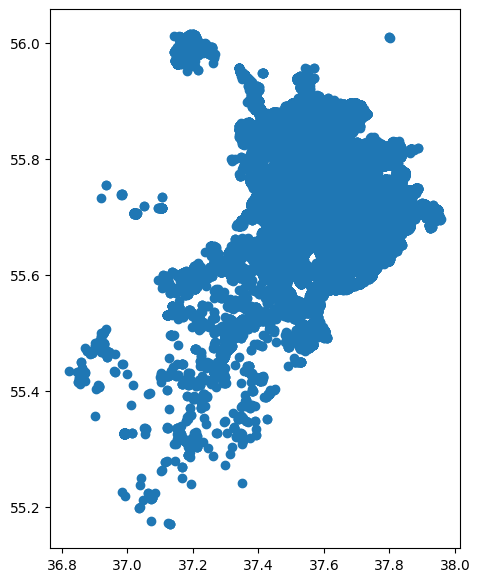

In [4]:
fig, ax = plt.subplots(figsize=(12, 7))
data.plot(ax=ax)
plt.show()

In [5]:
moscow = gpd.read_file(
    "/home/jupyter/datasphere/s3/s3-sirius/sirius_2024_participants/data/mo.geojson"
)

In [6]:
moscow = gpd.sjoin(data, moscow, how="inner", op="intersects")

/kernel/lib/python3.10/site-packages/ml_kernel/_vendor/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
moscow["transaction_sum_log"] = (
    np.log10(moscow["transaction_sum"]) / np.log10(moscow["transaction_sum"]).max()
)
moscow["transaction_count_log"] = np.log10(moscow["transaction_count"])
moscow_t = moscow.loc[moscow.transaction_count_log < 6]

In [8]:
moscow

,industry_type,lat,lon,transaction_sum,transaction_count,customer_count,chain_class,zone_id,geometry,index_right,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,transaction_sum_log,transaction_count_log
3,apteka,55.746821,37.760333,70367.11,109,79,356,81965409,POINT (37.76033 55.74682),121,Перово,45263583,45312000,Восточный,45263000,ВАО,Муниципальный округ,0.498252,2.037426
13310,apteka,55.746821,37.760333,1278028.03,1864,602,-999,81965409,POINT (37.76033 55.74682),121,Перово,45263583,45312000,Восточный,45263000,ВАО,Муниципальный округ,0.627680,3.270446
13667,apteka,55.747064,37.755293,1986389.96,2518,899,-999,81965409,POINT (37.75529 55.74706),121,Перово,45263583,45312000,Восточный,45263000,ВАО,Муниципальный округ,0.647366,3.401056
29867,apteka,55.746897,37.758644,335811.95,335,196,-999,81965409,POINT (37.75864 55.74690),121,Перово,45263583,45312000,Восточный,45263000,ВАО,Муниципальный округ,0.568017,2.525045
37176,avtoservis,55.748088,37.755320,928647.78,104,81,-999,81965409,POINT (37.75532 55.74809),121,Перово,45263583,45312000,Восточный,45263000,ВАО,Муниципальный округ,0.613424,2.017033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238619,kafe_delivery,55.814057,37.861672,114477.00,358,92,25,82271826,POINT (37.86167 55.81406),139,Восточный,45263561,45304000,Восточный,45263000,ВАО,Муниципальный округ,0.519976,2.553883
863548,other,55.810208,37.863594,3723432.27,223,211,-999,82271826,POINT (37.86359 55.81021),139,Восточный,45263561,45304000,Восточный,45263000,ВАО,Муниципальный округ,0.675415,2.348305
493388,other,55.816692,37.861690,6221.00,16,16,-999,82293712,POINT (37.86169 55.81669),139,Восточный,45263561,45304000,Восточный,45263000,ВАО,Муниципальный округ,0.389964,1.204120
582249,other,55.814912,37.874850,21450.00,17,10,-999,82293714,POINT (37.87485 55.81491),139,Восточный,45263561,45304000,Восточный,45263000,ВАО,Муниципальный округ,0.445219,1.230449


In [9]:
data1 = pd.read_parquet(
    r"/home/jupyter/datasphere/s3/s3-sirius/sirius_2024_participants/data/geo_features/geo_features_777_buffer_5.parquet"
)

In [10]:
data1

,zone_id,city_id,average_check,check_count,turnover,turnover_log,average_check_city_relative,check_count_city_relative,turnover_city_relative,turnover_log_city_relative,average_check_neighbour_max,check_count_neighbour_max,turnover_neighbour_max,turnover_log_neighbour_max,average_check_neighbour_mean,check_count_neighbour_mean,turnover_neighbour_mean,turnover_log_neighbour_mean,construction_year_max,construction_year_mean,construction_year_min,price_max,price_mean,price_min,price_meter_max,price_meter_mean,price_meter_min,room_space_max,room_space_mean,room_space_min,construction_year_max_city_relative,construction_year_mean_city_relative,construction_year_min_city_relative,price_max_city_relative,price_mean_city_relative,price_min_city_relative,price_meter_max_city_relative,price_meter_mean_city_relative,price_meter_min_city_relative,room_space_max_city_relative,...,professional_area_transport_logistics_city_relative,professional_area_transport_logistics_neighbour_max,professional_area_transport_logistics_neighbour_mean,professional_area_working_staff,professional_area_working_staff_city_relative,professional_area_working_staff_neighbour_max,professional_area_working_staff_neighbour_mean,realty_commercial_real_estate,realty_commercial_real_estate_city_relative,realty_commercial_real_estate_neighbour_max,realty_commercial_real_estate_neighbour_mean,realty_houses_cottages_and_land,realty_houses_cottages_and_land_city_relative,realty_houses_cottages_and_land_neighbour_max,realty_houses_cottages_and_land_neighbour_mean,realty_new_buildings,realty_new_buildings_city_relative,realty_new_buildings_neighbour_max,realty_new_buildings_neighbour_mean,realty_overseas_property,realty_overseas_property_city_relative,realty_overseas_property_neighbour_max,realty_overseas_property_neighbour_mean,realty_real_estate_rent,realty_real_estate_rent_city_relative,realty_real_estate_rent_neighbour_max,realty_real_estate_rent_neighbour_mean,realty_resale_properties,realty_resale_properties_city_relative,realty_resale_properties_neighbour_max,realty_resale_properties_neighbour_mean,sex_female,sex_female_city_relative,sex_female_neighbour_max,sex_female_neighbour_mean,sex_male,sex_male_city_relative,sex_male_neighbour_max,sex_male_neighbour_mean,datep
0,81790352,186,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.977283,0.190242,0.141401,0.180026,1.023233,0.239490,0.174264,0.089732,1.254044,0.121047,0.083731,0.139943,1.184204,0.175156,0.132293,0.291999,1.080195,0.333653,0.287664,0.031549,1.175728,0.054520,0.032984,0.131786,1.217073,0.158234,0.113943,0.258833,1.098309,0.311221,0.245859,0.543919,1.117525,0.586404,0.503338,0.500452,0.903425,0.663804,0.538367,2020-09-30
1,80126924,777,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.743878,0.194145,0.124273,0.286632,1.510377,0.229060,0.155427,0.044403,0.623919,0.165971,0.085770,0.120209,1.009996,0.195109,0.120679,0.236529,0.782201,0.297867,0.211517,0.024140,0.812871,0.057282,0.039046,0.138728,1.108093,0.191497,0.121311,0.259492,0.942204,0.295453,0.196831,0.462868,0.992537,0.553481,0.437729,0.577536,0.987210,0.702837,0.597233,2020-09-30
2,80520889,427,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,233.333333,1311.566558,2.500000e+05,12.429220,188.888889,821.009776,1.759259e+05,8.746488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.897454,0.179150,0.132582,0.145943,0.764182,0.172459,0.154365,0.073700,1.115602,0.095429,0.065021,0.135284,1.193895,0.172655,0.123754,0.245438,0.999793,0.326189,0.247998,0.044862,1.635168,0.074690,0.033050,0.132664,1.244071,0.147749,0.107516,0.221113,1.06

In [11]:
transac = pd.read_parquet(
    "/home/jupyter/datasphere/s3/s3-sirius/sirius_2024_participants/data/transaction_data/transaction_data_777_buffer_5.parquet"
)

In [12]:
transac

,industry_type,lat,lon,transaction_sum,transaction_count,customer_count,chain_class,geometry,index_right,zone_id
3,apteka,55.746821,37.760333,7.036711e+04,109,79,356,b'\x01\x01\x00\x00\x00\xe8\x88|\x97R\xe1B@\xa6...,11836,81965409
13310,apteka,55.746821,37.760333,1.278028e+06,1864,602,-999,b'\x01\x01\x00\x00\x00\xe8\x88|\x97R\xe1B@\xa6...,11836,81965409
13667,apteka,55.747064,37.755293,1.986390e+06,2518,899,-999,b'\x01\x01\x00\x00\x00\xe9\xf2\xe6p\xad\xe0B@m...,11836,81965409
29867,apteka,55.746897,37.758644,3.358120e+05,335,196,-999,b'\x01\x01\x00\x00\x00?\xa7 ?\x1b\xe1B@\x81=&R...,11836,81965409
37176,avtoservis,55.748088,37.755320,9.286478e+05,104,81,-999,b'\x01\x01\x00\x00\x00\xe2\x01eS\xae\xe0B@\xd9...,11836,81965409
...,...,...,...,...,...,...,...,...,...,...
1903590,other,55.175026,37.072142,3.830220e+05,192,127,-999,b'\x01\x01\x00\x00\x00\x82U\xf5\xf2;\x89B@\x90...,324,79185800
1906933,other,55.510012,37.252578,3.276465e+05,442,264,-999,b'\x01\x01\x00\x00\x004\xd8\xd4yT\xa0B@\xa6H\x...,6489,80827273
1908394,other,55.992810,37.189858,3.350000e+03,4,4,-999,b'\x01\x01\x00\x00\x00&qVDM\x98B@%\x92\xe8e\x1...,15713,83125295
1925778,stomatologia,55.329569,37.161588,1.535800e+05,49,38,-999,b'\x01\x01\x00\x00\x00\x89\xb6c\xea\xae\x94B@A...,2567,79951821


In [13]:
data1.merge(transac, on="zone_id", how="inner")

,zone_id,city_id,average_check,check_count,turnover,turnover_log,average_check_city_relative,check_count_city_relative,turnover_city_relative,turnover_log_city_relative,average_check_neighbour_max,check_count_neighbour_max,turnover_neighbour_max,turnover_log_neighbour_max,average_check_neighbour_mean,check_count_neighbour_mean,turnover_neighbour_mean,turnover_log_neighbour_mean,construction_year_max,construction_year_mean,construction_year_min,price_max,price_mean,price_min,price_meter_max,price_meter_mean,price_meter_min,room_space_max,room_space_mean,room_space_min,construction_year_max_city_relative,construction_year_mean_city_relative,construction_year_min_city_relative,price_max_city_relative,price_mean_city_relative,price_min_city_relative,price_meter_max_city_relative,price_meter_mean_city_relative,price_meter_min_city_relative,room_space_max_city_relative,...,realty_commercial_real_estate_neighbour_max,realty_commercial_real_estate_neighbour_mean,realty_houses_cottages_and_land,realty_houses_cottages_and_land_city_relative,realty_houses_cottages_and_land_neighbour_max,realty_houses_cottages_and_land_neighbour_mean,realty_new_buildings,realty_new_buildings_city_relative,realty_new_buildings_neighbour_max,realty_new_buildings_neighbour_mean,realty_overseas_property,realty_overseas_property_city_relative,realty_overseas_property_neighbour_max,realty_overseas_property_neighbour_mean,realty_real_estate_rent,realty_real_estate_rent_city_relative,realty_real_estate_rent_neighbour_max,realty_real_estate_rent_neighbour_mean,realty_resale_properties,realty_resale_properties_city_relative,realty_resale_properties_neighbour_max,realty_resale_properties_neighbour_mean,sex_female,sex_female_city_relative,sex_female_neighbour_max,sex_female_neighbour_mean,sex_male,sex_male_city_relative,sex_male_neighbour_max,sex_male_neighbour_mean,datep,industry_type,lat,lon,transaction_sum,transaction_count,customer_count,chain_class,geometry,index_right
0,81812188,777,412.5,18484.971735,5250000.0,15.433983,0.245956,10.992552,2.814257,1.748013,6500.0,18484.971735,5250000.0,15.433983,2154.166667,3304.599309,2.057292e+06,14.251533,1966.0,1946.745455,1928.5,19875000.0,1.454792e+07,8625000.0,336675.25,265329.413203,214227.5,78.175,55.431797,35.2,0.986207,0.982253,0.978860,0.499088,0.920935,1.077508,0.884595,1.182009,1.269402,0.649982,...,0.090927,0.085511,0.130123,1.063040,0.135363,0.127298,0.305257,1.123151,0.318110,0.299645,0.031102,1.035062,0.033701,0.030937,0.134429,1.19988,0.137936,0.132670,0.259909,1.121643,0.262093,0.255942,0.523785,1.132878,0.523785,0.493147,0.515326,0.894581,0.568068,0.545073,2020-09-30,apteka,55.716813,37.607709,6.719925e+06,5691,2703,-999,b'\x01\x01\x00\x00\x00\x10>\x94h\xc9\xcdB@\x80...,10940
1,81812188,777,412.5,18484.971735,5250000.0,15.433983,0.245956,10.992552,2.814257,1.748013,6500.0,18484.971735,5250000.0,15.433983,2154.166667,3304.599309,2.057292e+06,14.251533,1966.0,1946.745455,1928.5,19875000.0,1.454792e+07,8625000.0,336675.25,265329.413203,214227.5,78.175,55.431797,35.2,0.986207,0.982253,0.978860,0.499088,0.920935,1.077508,0.884595,1.182009,1.269402,0.649982,...,0.090927,0.085511,0.130123,1.063040,0.135363,0.127298,0.305257,1.123151,0.318110,0.299645,0.031102,1.035062,0.033701,0.030937,0.134429,1.19988,0.137936,0.132670,0.259909,1.121643,0.262093,0.255942,0.523785,1.132878,0.523785,0.493147,0.515326,0.894581,0.568068,0.545073,2020-09-30,apteka,55.714414,37.608526,6.270498e+05,474,319,-999,b'\x01\x01\x00\x00\x00\x02b\x12.\xe4\xcdB@\xfb...,10940
2,81812188,777,412.5,18484.971735,5250000.0,15.433983,0.245956,10.992552,2.814257,1.748013,6500.0,18484.971735,5250000.0,15.433983,2154.166667,3304.599309,2.057292e+06,14.251533,1966.0,1946.745455,1928.5,19875000.0,1.454792e+07,8625000.0,336675.25,265329.413203,214227.5,78.175,55.431797,35.2,0.986207,0.982253,0.978860,0.499088,0.920935,1.077508,0.884595,1.182009,1.269402,0.649982,...,0.090927,0.085511,0.130123,1.063040,0.135363,0.127298,0.305257,1.123151,0.318110,0.299645,0

In [14]:
transac["industry_type"].unique()

array(['apteka', 'avtoservis', 'kafe_delivery', 'napitki_tabak', 'other',
       'zhivotnye', 'beauty_care', 'clothes', 'elektronika_tehnika',
       'kosmetika_parfum', 'medicina', 'yuvelirny', 'fitnes',
       'stomatologia', 'avtozapchasti', 'detskie_tovary',
       'kompjuterny_remont'], dtype=object)

In [15]:
transac.loc[transac["industry_type"] == "kafe_delivery"]

,industry_type,lat,lon,transaction_sum,transaction_count,customer_count,chain_class,geometry,index_right,zone_id
188105,kafe_delivery,55.750586,37.757153,2.139205e+05,1039,97,-999,b'\x01\x01\x00\x00\x00\xbe\x88\xb6c\xea\xe0B@\...,11836,81965409
210922,kafe_delivery,55.749633,37.754278,1.430000e+04,105,59,77,b'\x01\x01\x00\x00\x00\xd0\x0bw.\x8c\xe0B@N\x8...,11836,81965409
221324,kafe_delivery,55.748088,37.755320,7.247521e+05,2103,1245,-999,b'\x01\x01\x00\x00\x00\xe2\x01eS\xae\xe0B@\xd9...,11836,81965409
227214,kafe_delivery,55.746897,37.758644,2.200000e+03,21,10,-999,b'\x01\x01\x00\x00\x00?\xa7 ?\x1b\xe1B@\x81=&R...,11836,81965409
235958,kafe_delivery,55.750586,37.757153,1.285850e+06,5580,134,-999,b'\x01\x01\x00\x00\x00\xbe\x88\xb6c\xea\xe0B@\...,11836,81965409
...,...,...,...,...,...,...,...,...,...,...
304997,kafe_delivery,55.336165,37.325827,1.308600e+05,139,88,-999,b'\x01\x01\x00\x00\x00\xaf\x93\xfa\xb2\xb4\xa9...,2666,79973728
305047,kafe_delivery,55.508463,37.540793,1.907250e+06,831,609,-999,b'\x01\x01\x00\x00\x00\xefs|\xb48\xc5B@\xef\x1...,6421,80805423
306010,kafe_delivery,55.480005,37.385214,7.850000e+02,8,5,-999,b'\x01\x01\x00\x00\x00\r\xfb=\xb1N\xb1B@Ou\xc8...,5765,80674087
306205,kafe_delivery,55.564613,37.359630,3.212280e+05,1245,677,12,b'\x01\x01\x00\x00\x00\x8bT\x18[\x08\xaeB@\xbf...,7545,81089918


In [16]:
tr = transac.groupby("zone_id", as_index=False).agg(
    transaction_sum=("transaction_sum", "sum")
)

In [17]:
tr.merge(data2, on="zone_id", how="inner")

NameError: name 'data2' is not defined

In [ ]:
tr

In [ ]:
data_features = transac.loc[transac.industry_type != "kafe_delivery"]
data_features = data_features.pivot_table(
    index="zone_id",
    columns="industry_type",
    values=["transaction_sum", "customer_count"],
    aggfunc=["sum", "mean"],
)
data_features = data_features.reset_index()
data_features.columns = ["zone_id"] + [
    "_".join(col).strip() for col in data_features.columns.values[1:]
]

In [ ]:
data_features

In [ ]:
itog = data_features.merge(data2, on="zone_id", how="inner")

In [ ]:
data_msk = itog.merge(tr, on="zone_id", how="inner")

In [ ]:
data_msk

In [ ]:
data_msk.describe

In [ ]:
data = pd.read_csv(
    "/home/jupyter/datasphere/s3/s3-sirius/sirius_2024_participants/data/data.csv"
)

In [ ]:
data

In [ ]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
first = pd.read_parquet(
    r"/home/jupyter/datasphere/s3/s3-sirius/sirius_2024_participants/data/transaction_data/transaction_data_777_buffer_5.parquet"
)

In [ ]:
first = first.drop(columns=["geometry"])
first = gpd.GeoDataFrame(
    first, crs="epsg:4326", geometry=gpd.points_from_xy(first["lon"], first["lat"])
)

first.head()

In [ ]:
second = first[["zone_id", "geometry"]]

In [ ]:
second

In [ ]:
data.merge(second, on="zone_id", how="inner")

In [ ]:
four = data[["zone_id", "check_count"]]

In [ ]:
third = second

In [ ]:
third = third.merge(four, on="zone_id", how="inner")

In [ ]:
third

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
third = third.to_crs("EPSG:3857")
third.plot(
    ax=ax, column=third["check_count"], linewidth=0, markersize=1, color="#0186c8ff"
)
cx.add_basemap(ax, crs=third.crs, source=cx.providers.CartoDB.Positron)
plt.axis("off")
plt.show()
plt.savefig("transac.png")

In [ ]:
import branca
import folium
import geopandas as gpd
import matplotlib
import networkx as nx
import numpy as np
import pandas as pd

In [ ]:
data

In [ ]:
data1 = data[["zone_id", "transaction_sum", "sex_male"]]

In [ ]:
data1

In [ ]:
third["geometry"]

In [ ]:
data2 = third[["zone_id", "geometry"]]

In [ ]:
data1.merge(data2, on="zone_id", how="inner")

In [ ]:
df = data1
xs = data1["zone_id"]
ys = np.log10(data1["transaction_sum"])
pd.DataFrame(np.array([xs, ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel("сумма")
plt.ylabel("зона")
plt.show()

In [ ]:
data

In [ ]:
data_male

In [ ]:
data_male["check_count"] = data_male["check_count"].astype(int)

In [ ]:
data_male = data[["zone_id", "check_count", "sex_male", "sex_female"]]

In [ ]:
data_male["cnt_male"] = data_male["check_count"] * data_male["sex_male"]

In [ ]:
data_male

In [ ]:
data_male["cnt_female"] = data_male["check_count"] * data_male["sex_female"]

In [ ]:
data_male

In [ ]:
data_male = data_male[["zone_id", "cnt_male", "cnt_female"]]

In [ ]:
data_male

In [ ]:
data_male.isnull().sum()

In [ ]:
data_male = data_male.dropna()

In [ ]:
data_male

In [ ]:
data_male["cnt_male"] = data_male["cnt_male"].astype(int)
data_male["cnt_female"] = data_male["cnt_female"].astype(int)

In [ ]:
data_male

In [ ]:
d = data[["zone_id", "transaction_sum"]]

In [ ]:
data_male = data_male.merge(d, on="zone_id", how="inner")

In [ ]:
data_male

In [ ]:
df = data_male
xs = data_male["cnt_male"]
ys = data_male["zone_id"]
pd.DataFrame(np.array([xs, ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel("кол-во мужчин")
plt.ylabel("зона")
plt.show()

In [ ]:
gist = data_male[["zone_id", "cnt_male", "cnt_female"]]

In [ ]:
third

In [ ]:
t = third[["zone_id", "geometry"]]

In [ ]:
data_male

In [ ]:
data_male = data_male.merge(t, on="zone_id", how="inner")

In [ ]:
data_male

In [ ]:
data_male = data_male[["zone_id", "cnt_male", "cnt_female", "geometry"]]

In [ ]:
data_male

In [ ]:
d1 = data_male[["zone_id", "cnt_male", "cnt_female"]]

In [ ]:
third

In [ ]:
third1 = third[["zone_id", "geometry"]]

In [ ]:
third = third.merge(d1, on="zone_id", how="inner")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
third = third.to_crs("EPSG:3857")
third.plot(ax=ax, column=third["cnt_male"], linewidth=0, cmap="jet")
cx.add_basemap(ax, crs=third.crs)
plt.show()

###покупатели зашли - купили / зашли и вышли

In [ ]:
data

In [ ]:
nov = pd.read_parquet(
    "/home/jupyter/datasphere/s3/s3-sirius/sirius_2024_participants/data/transaction_data/transaction_data_777_buffer_5.parquet"
)

In [ ]:
nov

In [ ]:
nov = nov[nov["industry_type"] == "kafe_delivery"]

In [ ]:
nov

In [ ]:
nov["industry_type"].unique()

In [ ]:
nov["raz"] = nov["customer_count"] - nov["transaction_count"]

In [ ]:
nov

In [ ]:
nov[nov["raz"] > 0]

In [ ]:
nov["unpost_customer"] = (
    nov["transaction_sum"] / nov["transaction_count"] - nov["customer_count"]
)

In [ ]:
nov

In [ ]:
nov.drop("post_customer", axis=1, inplace=True)

In [ ]:
nov

In [ ]:
nov["unpost_customer"]

In [ ]:
post_customer = nov[nov["unpost_customer"] < 0]

In [ ]:
post_customer
post_customer = post_customer.drop(columns=["index_right", "geometry"])
post_customer = gpd.GeoDataFrame(
    post_customer,
    crs="epsg:4326",
    geometry=gpd.points_from_xy(post_customer["lon"], post_customer["lat"]),
)

In [ ]:
post_customer

In [ ]:
post_customer.crs

In [ ]:
post_customer_t = post_customer.copy()
post_customer_t = post_customer_t.to_crs("epsg:3857")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
post_customer_t.plot(
    ax=ax,
    column=np.log10(post_customer_t["transaction_sum"]),
    markersize=5,
    color="#0186c8ff",
)
cx.add_basemap(ax, crs=post_customer_t.crs, source=cx.providers.CartoDB.Positron)
plt.axis("off")
plt.show()
plt.savefig("post_customer0.png")

In [ ]:
nov

In [ ]:
import pickle

with open(
    r"/home/jupyter/datasphere/s3/s3-sirius/sirius_2024_participants/data/graphs/graph_777_buffer_5.gpickle",
    "rb",
) as f:
    G_moscow = pickle.load(f)

geometry = nx.get_node_attributes(G_moscow, "geometry")
geometry_df = gpd.GeoDataFrame(
    data={"zone_id": geometry.keys(), "geometry": geometry.values()},
    geometry="geometry",
    crs="epsg:4326",
)

In [ ]:
cafe_df_grouped = nov.groupby("zone_id", as_index=False).agg(
    transaction_sum=("transaction_sum", "sum"),
    transaction_count=("transaction_count", "sum"),
)

cafe_df_grouped = cafe_df_grouped.merge(geometry_df, on="zone_id", how="left")
cafe_df_grouped = gpd.GeoDataFrame(
    cafe_df_grouped, geometry="geometry", crs="epsg:4326"
)
cafe_df_grouped.head()

In [ ]:
fig, ax = plt.subplots(figsize=(40, 80))
moscow_t = cafe_df_grouped.to_crs("EPSG:3857")
moscow_t.plot(
    ax=ax,
    column=np.log10(moscow_t["transaction_count"]),
    cmap="Blues",
    markersize=10,
    alpha=0.7,
)
cx.add_basemap(ax, crs=moscow_t.crs, source=cx.providers.CartoDB.Positron)
plt.axis("off")
plt.show()
fig.savefig("12.png", dpi=300)